<a href="https://colab.research.google.com/github/bcaffo/ds4ph-bme/blob/master/notebooks/tensorflow_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Illustrating TF in a colab notebook by going through the colab example with topics from our class. Code taken from:
[the TF team's colab notebook](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=rYb6DrEH0GMv).

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


Import the data. It's a collection of 28x28 images of handwritten digits.

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
[x_train.shape, y_train.shape, x_test.shape, y_test.shape]

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

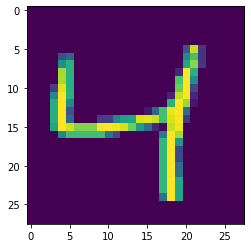

In [0]:
plt.imshow(x_train[2,:,:])

Create a model that has 

* The input layer flattened from 28x28 to a vector
* A fully connected layer with 128 hidden nodes
* A dropout layer with 20% dropout
* A fully connected layer with 10 nodes

Note the output layer is not included in the model.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Now that we've created the model, it gets initialized with weights. Of course, these aren't good weights. But, we can illustrate forward propagation through the network.

In [0]:
p = model(x_test[:1]).numpy()
p

array([[ 0.38137725,  0.3295499 , -0.03025779,  0.20247848, -0.11673211,
        -0.20458013, -0.10713655, -0.05961871, -0.08456571,  0.44097432]],
      dtype=float32)

Note that these are the linear predictors. If we want to change them into softmax predictions (i.e. multivariate sigmoidal transformation) we need to do that separately.

In [0]:
tf.nn.softmax(p).numpy()

array([[0.13230339, 0.12562111, 0.08765973, 0.11063085, 0.08039792,
        0.07363646, 0.0811731 , 0.08512338, 0.08302607, 0.14042798]],
      dtype=float32)

Here's the same code for that.

In [0]:
exp_eta = np.exp(p)
exp_eta / np.sum(exp_eta)

array([[0.13230339, 0.12562111, 0.08765973, 0.11063084, 0.08039792,
        0.07363646, 0.0811731 , 0.08512338, 0.08302607, 0.14042798]],
      dtype=float32)

Now we want to grab a loss function. Here's an example of applying our loss function to our forward propigated example.

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_test[:1], p).numpy()

2.4636536

Now we have to complete the model with an optimizer, tell
it what our loss function is, and tell it what metrics to save.

In [0]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Now we can fit the model.

In [0]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3026 - accuracy: 0.9110
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1460 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1097 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0903 - accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9762


And evaluate the model fit on the testing data

In [0]:
model.evaluate(x_test,  y_test, verbose=2)


313/313 - 0s - loss: 0.0761 - accuracy: 0.9771


[0.07614079862833023, 0.9771000146865845]